# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una estimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [5]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [6]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [7]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

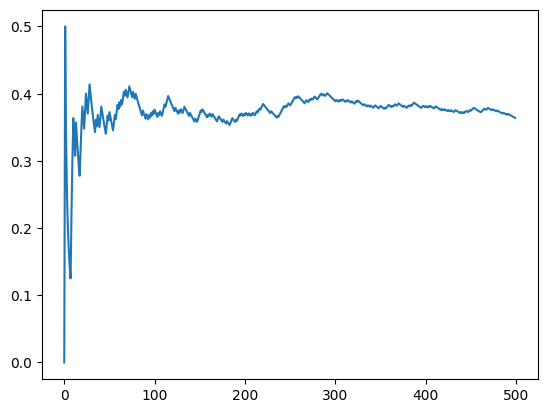

In [8]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [9]:
print(np.mean(X), np.std(X))

0.3732895218328377 0.03128305969647072


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [10]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [11]:
Y=modelo(120)

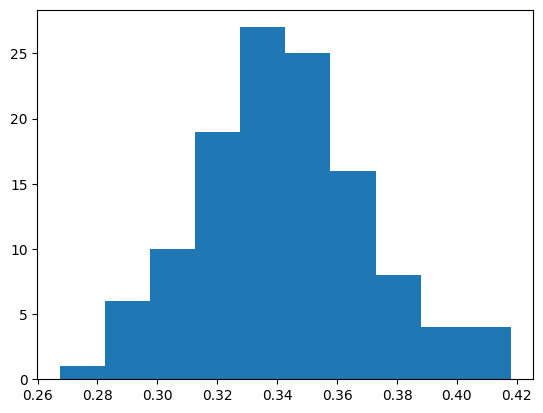

In [12]:
plt.hist(Y)
plt.show()

In [13]:
print(np.mean(Y), np.std(Y))

0.34203703248380335 0.028909983165051237


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [14]:
np.mean(Y)

0.34203703248380335

In [15]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.33402359398892467, 0.350050470978682)

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [16]:
N = (2*np.std(X)*1.96/0.01)**2

In [17]:
print(N)

150.38017327097953


### Podemos comparar con la sulución analítica del problema.

Para ello usamos la teoría sobre la suma de variables con distribución normal.

**Teorema de la combinación lineal de variables aleatorias normales**

Cualquier combinación lineal de variables aleatorias normales independientes es una variable aleatoria normal con media la misma combinación lineal de las medias y con varianza la combinación lineal de las varianzas con los coeficientes que las acompañan al cuadrado.

Sean las variables aleatorias $x_i$ con $i=1,2,3,...n$ todas ellas independientes tales que
$$x_i\sim N(\mu_i, σ_i)$$

Consideremos una combinación lineal de estas variables aleatorias de la forma:
$$Y=a_ix_i+a_2x_2+...+a_nx_n$$

donde $a_1, a_2,...,a_n$ son coeficientes constantes.

Ya que cualquier combinación lineal de variables aleatorias normales sigue una distribución normal,
$$Y\sim N\left(\sum_{i=1}^n a_i\mu_i,\sqrt{\sum_{i=1}^n a_i^2\sigma_i^2}\right)$$

Usando el teorema anterior
$$Y=x_2-x_1$$
Esto se distribuye normalmente con media
$$\mu_Y=1(1.48)+1.5(-1)=-0.02$$
Y desviación estandar
$$σ_Y=\sqrt{1^2(0.0009)+(-1)^2(0.0016)}=0.05$$

Entonces
$$P(x_2-x_1>0)=P(Y>0)=1-P(Y=0)=1-F(0)$$

Donde $F(0)$ es la función de distribución de Y, esta se define como
$$F(x)=\int_{-∞}^x \frac{1}{\sqrt{2\pi}σ}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Sin embargo, para simplificar los calculos nos apoyaremos de las tablas de distribución normal tipificada, por lo que debemos estandarizar nuestra variable Y como sigue

$$P\left(\frac{Y-\mu_Y}{\sigma_Y}>\frac{0-(-0.02)}{0.05}\right)=P(z>0.4)$$

Finalmente, la probabilidad de que haya interferencia es
$$P(x_2-x_1>0)=1-P(z=0.4)=1-0.6554=0.3446$$

La ley de los grandes números nos dice que si realizamos una misma prueba muchas veces, la frecuencia con la que ocurre un evento específico se acercará a un valor constante. Este valor constante representa la probabilidad de que ese evento ocurra.

Entonces, si repetimos el experimento varias veces como en el paso 6 y calculamos la frecuencia con la que ocurre la interferencia, encontramos que es aproximadamente el  $34.46\%$.Esto significa que esa probabilidad es la misma cada vez de que exista interferencia en un ensayo.


In [18]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

In [19]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y)

0.0025412259058724684